In [ ]:
!pip uninstall tensorflow -y
!pip install  tensorflow==2.4.1

In [ ]:
!pip uninstall keras -y
!pip install  keras==2.4.3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.insert(0,"/content/drive/MyDrive/Colab Notebooks/Major_Project")

In [6]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
import keras
print(keras.__version__)

2.4.3


In [33]:
from keras_segmentation.models.unet import mobilenet_unet

model = mobilenet_unet(n_classes=6 ,  input_height=256, input_width=256  )

model.train(
    train_images =  "/content/drive/MyDrive/Colab Notebooks/Major_Project/Public Dataset/Train Image/images",
    train_annotations = "/content/drive/MyDrive/Colab Notebooks/Major_Project/Public Dataset/Train Image/annotated image",
    checkpoints_path = "/content/drive/MyDrive/Colab Notebooks/Major_Project/tmp/mobilenet_unet" ,
    epochs=45,
    batch_size=8,
    auto_resume_checkpoint=True
)

Loading the weights from latest checkpoint  /content/drive/MyDrive/Colab Notebooks/Major_Project/tmp/mobilenet_unet.00043
Verifying training dataset


100%|██████████| 435/435 [00:04<00:00, 106.15it/s]


Dataset verified! 
Epoch 44/45
512/512 [==============================] - 80s 151ms/step - loss: 0.0012 - accuracy: 0.9996

Epoch 00044: saving model to /content/drive/MyDrive/Colab Notebooks/Major_Project/tmp/mobilenet_unet.00044
Epoch 45/45
512/512 [==============================] - 78s 153ms/step - loss: 1.8892e-04 - accuracy: 1.0000

Epoch 00045: saving model to /content/drive/MyDrive/Colab Notebooks/Major_Project/tmp/mobilenet_unet.00045


In [35]:
model.save("/content/drive/MyDrive/Colab Notebooks/Major_Project/saved_model/mobilenet_unet.h5")

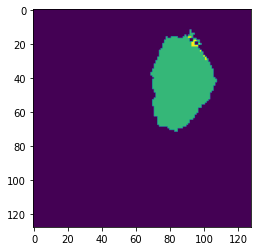

In [34]:
out = model.predict_segmentation(
    inp="/content/drive/MyDrive/Colab Notebooks/Major_Project/Public Dataset/Test Image/images/1.png",
    out_fname="/content/drive/MyDrive/Colab Notebooks/Major_Project/output/out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)

In [ ]:
# model.save("/content/drive/MyDrive/Colab Notebooks/Major_Project/saved_model/mobilenet_unet") modelsaved format

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/image-segmentation-keras/leather_final/model/resnet50_unet/assets


In [36]:
print(model.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/Colab Notebooks/Major_Project/Public Dataset/Test Image/images"  ,
                                  annotations_dir="/content/drive/MyDrive/Colab Notebooks/Major_Project/Public Dataset/Test Image/annotated image" ) )

111it [00:07, 15.35it/s]

{'frequency_weighted_IU': 0.933026891505006, 'mean_IU': 0.6339442540675632, 'mean_F1': 0.7506715753006548, 'mean_Recall': 0.7188227583596332, 'Total_Error': array([0.91143799, 0.18771362, 0.36920166, 0.36825562, 0.0993042 ,
       0.18063354]), 'mean_Precision': 0.8253799949327821, 'class_wise_IU': array([0.96407357, 0.53938895, 0.37841032, 0.64860733, 0.91018493,
       0.36300043]), 'class_wise_f1_score': array([0.98170821, 0.70078319, 0.54905323, 0.78685484, 0.95298096,
       0.53264903]), 'class_wise_Recall': array([0.98436271, 0.55567985, 0.55044843, 0.88783259, 0.93515775,
       0.39945523]), 'class_wise_Precision': array([0.97906798, 0.94844954, 0.54766508, 0.70650088, 0.97149675,
       0.79909974])}


## Loading 

In [37]:
from keras_segmentation.models.unet import mobilenet_unet

model2 = mobilenet_unet(n_classes=6 ,  input_height=256, input_width=256  )

model2.load_weights("/content/drive/MyDrive/Colab Notebooks/Major_Project/saved_model/mobilenet_unet.h5")
# model2.summary()

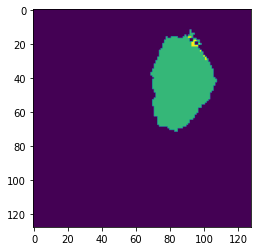

In [38]:
out = model2.predict_segmentation(
    inp="/content/drive/MyDrive/Colab Notebooks/Major_Project/Public Dataset/Test Image/images/1.png",
    out_fname="/content/drive/MyDrive/Colab Notebooks/Major_Project/output/out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)

In [39]:
print(model2.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/Colab Notebooks/Major_Project/Public Dataset/Test Image/images"  ,
                                  annotations_dir="/content/drive/MyDrive/Colab Notebooks/Major_Project/Public Dataset/Test Image/annotated image" ) )

111it [00:06, 16.27it/s]

{'frequency_weighted_IU': 0.933026891505006, 'mean_IU': 0.6339442540675632, 'mean_F1': 0.7506715753006548, 'mean_Recall': 0.7188227583596332, 'Total_Error': array([0.91143799, 0.18771362, 0.36920166, 0.36825562, 0.0993042 ,
       0.18063354]), 'mean_Precision': 0.8253799949327821, 'class_wise_IU': array([0.96407357, 0.53938895, 0.37841032, 0.64860733, 0.91018493,
       0.36300043]), 'class_wise_f1_score': array([0.98170821, 0.70078319, 0.54905323, 0.78685484, 0.95298096,
       0.53264903]), 'class_wise_Recall': array([0.98436271, 0.55567985, 0.55044843, 0.88783259, 0.93515775,
       0.39945523]), 'class_wise_Precision': array([0.97906798, 0.94844954, 0.54766508, 0.70650088, 0.97149675,
       0.79909974])}
